Group 5: Sam Young, Raveel Tejani

## Linear Regression with Gradient Descent

In cases where the analytical solution cannot be computed efficiently (requires matrix inversion), we turn to numerical optimization.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model #New!

font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 300

### Step 1: Setup

### We can use the data set with outliers from the previous notebook.

In [2]:
x = np.arange(100) 
np.random.seed(16) #set seed for reproducibility purposes
yp = 3*x + 3 + 2*(np.random.poisson(3*x+3,100)-(3*x+3)) #generate some data with scatter following Poisson distribution 
                                                       #with exp value = y from linear model, centered around 0
np.random.seed(12) #set 
out = np.random.choice(100,15) #select 15 outliers indexes
yp_wo = np.copy(yp)
np.random.seed(12) #set again
yp_wo[out] = yp_wo[out] + 5*np.random.rand(15)*yp[out]

Perform again standard linear regression with the MSE loss and save the fit parameters for later.

In [3]:
model = linear_model.LinearRegression()
x = x.reshape(-1,1)
y = yp_wo.reshape(-1,1)
model.fit(x, y)
m = model.coef_[0][0]
b = model.intercept_[0]

As in Lab 9 for the analytical solution, add x0 = 1 to each instance of the feature matrix; this is the bias term and it is used in order to write the solution for a linear model in matrix multiplication form. Then calculate the MSE loss from this.

In [4]:
X = np.c_[np.ones(len(x)), x]
beta_0, beta_1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

intercept = beta_0[0]
slope = beta_1[0]

print('slope analytical: {:.3f}'.format(slope))
print('intercept analytical: {:.4f}'.format(intercept))

def mse(m,b, y, x):
    if len(y) != len(x):
        print("arrays not the right shape")
        return 0
    return np.sum((y - (m*x + b))**2)/len(y)

print('mean squared error {:.2f}'.format(mse(slope, intercept, y, x)))


slope analytical: 3.978
intercept analytical: 1.5481
mean squared error 43259.08


### Step 2: Batch GD

Implement Batch gradient descent as described in Chapter 5.3. Set *np.random.seed(10) at the beginning* and a learning rate $\eta = 0.0001$. Save the path taken by the algorithm in an array so at it can be plotted later. Compute the percentage difference between the loss from the normal equation and the batch GD loss for N_interations = 100, 1000, 10000, 100000.

In [5]:
np.random.seed(10)
lr = 0.0001
Ns = [100, 1000, 10000, 100000]

beta0 = np.random.randn(2,1)

def batch_GD(X, y, lr, N, beta):
    
    #initial values
    m = beta[1][0]
    b = beta[0][0]
    slopes = [m]
    intercepts = [b]
    mse_vals = [mse(m,b,y,X[:,1].reshape(-1,1))]
    
    for n in range(N): 
        grad = 2/len(y) * X.T.dot(X.dot(beta) - y)
        beta = beta - lr * grad
        m = beta[1][0]
        b = beta[0][0]
        intercepts.append(b)
        slopes.append(m)
        mse_vals.append(mse(m,b,y,X[:,1].reshape(-1,1)))
    
    return slopes, intercepts, mse_vals
        
slopes_0, intercepts_0, mse_vals_0 = batch_GD(X, y, lr, Ns[0], beta0)
slopes_1, intercepts_1, mse_vals_1 = batch_GD(X, y, lr, Ns[1], beta0)
slopes_2, intercepts_2, mse_vals_2 = batch_GD(X, y, lr, Ns[2], beta0)
slopes_3, intercepts_3, mse_vals_3 = batch_GD(X, y, lr, Ns[3], beta0)

n0per = (mse_vals_0[len(mse_vals_0)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)
n1per = (mse_vals_1[len(mse_vals_1)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)
n2per = (mse_vals_2[len(mse_vals_2)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)
n3per = (mse_vals_3[len(mse_vals_3)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)

print('for N =     100, % diff: {:.4e}'.format(n0per * 100))
print('for N =   1 000, % diff: {:.4e}'.format(n1per * 100))
print('for N =  10 000, % diff: {:.4e}'.format(n2per * 100))
print('for N = 100 000, % diff: {:.4e}'.format(n3per * 100))



for N =     100, % diff: 1.6253e-05
for N =   1 000, % diff: 1.4834e-05
for N =  10 000, % diff: 5.9510e-06
for N = 100 000, % diff: 6.4240e-10


### Step 3: Stochastic GD

Now implement a version of stochastic GD, starting again with the same seed and $\eta = 0.000005$. Save the path taken by the algorithm in an array so at it can be plotted later. Compute the percentage difference between the loss from the normal equation and the stochastic GD loss for N_interations = 10000, 100000

In [6]:
def stochastic_GD(X, y, lr, N, beta):
    
    #initial values
    m = beta[1][0]
    b = beta[0][0]
    slopes = [m]
    intercepts = [b]
    mse_vals = [mse(m,b,y,X[:,1].reshape(-1,1))]
    
    for n in range(N):
        random_index = np.random.randint(len(y))
        X_one = X[random_index:random_index+1]
        y_one = y[random_index:random_index+1]
        
        grad = 2 * X_one.T.dot(X_one.dot(beta) - y_one)
        beta = beta - lr * grad
        m = beta[1][0]
        b = beta[0][0]
        intercepts.append(b)
        slopes.append(m)
        mse_vals.append(mse(m,b,y,X[:,1].reshape(-1,1)))
    
    return slopes, intercepts, mse_vals


lr = 0.000005
#beta0 = np.random.randn(2,1)

slopes_0_s, intercepts_0_s, mse_vals_0_s = stochastic_GD(X, y, lr, 10000,  beta0)
slopes_1_s, intercepts_1_s, mse_vals_1_s = stochastic_GD(X, y, lr, 100000, beta0)

n0per_s = (mse_vals_0_s[len(mse_vals_0_s)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)
n1per_s = (mse_vals_1_s[len(mse_vals_1_s)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)

print('for N =  10 000,    % diff: {:.4e}'.format(n0per_s * 100))
print('for N = 100 000,    % diff: {:.4e}'.format(n1per_s * 100))

for N =  10 000,    % diff: 2.9127e-01
for N = 100 000,    % diff: 8.8135e-01


We find similar values for theta as the BG case, but not exactly the same.

### Step 4: Mini batch GD

Finally implement a version of mini batch GD, starting again with the same seed and $\eta = 0.000005$. Save the path taken by the algorithm in an array so at it can be plotted later. Compute the percentage difference between the loss from the normal equation and the stochastic GD loss for N_interations = 1000, 10000

In [7]:
def minibatch_GD(X, y, lr, N, beta, mb_size = 10):
    
    #initial values
    m = beta[1][0]
    b = beta[0][0]
    slopes = [m]
    intercepts = [b]
    mse_vals = [mse(m,b,y,X[:,1].reshape(-1,1))]
    
    for n in range(N):
        shuffled_indices = np.random.permutation(len(y))
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        x_mb = X_shuffled[:mb_size]
        y_mb = y_shuffled[:mb_size]
        
        grad = 2/mb_size * x_mb.T.dot(x_mb.dot(beta) - y_mb)
        beta = beta - lr * grad
        m = beta[1][0]
        b = beta[0][0]
        intercepts.append(b)
        slopes.append(m)
        mse_vals.append(mse(m,b,y,X[:,1].reshape(-1,1)))
    
    return slopes, intercepts, mse_vals

lr=0.000005

#beta0 = np.random.randn(2,1)


slopes_0_mb, intercepts_0_mb, mse_vals_0_mb = minibatch_GD(X, y, lr, 1000,  beta0)
slopes_1_mb, intercepts_1_mb, mse_vals_1_mb = minibatch_GD(X, y, lr, 10000, beta0)

n0per_mb = (mse_vals_0_mb[len(mse_vals_0_mb)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)
n1per_mb = (mse_vals_1_mb[len(mse_vals_1_mb)-1] - mse(slope, intercept, y, x))/mse(slope, intercept, y, x)

print('for N =  1 000,    % diff: {:.4e}'.format(n0per_mb * 100))
print('for N = 10 000,    % diff: {:.4e}'.format(n1per_mb * 100))

for N =  1 000,    % diff: 2.2796e-01
for N = 10 000,    % diff: 5.5852e-03


### Step 5: 

Compare the minimimization paths taken by the three algorithms. To this end, make a plot of the pairs of values $\theta_0$ and $\theta_1$ you saved earlier. Use thin lines (small lineweight) so that you can see the structure of the data. Indicate the final values in each case.

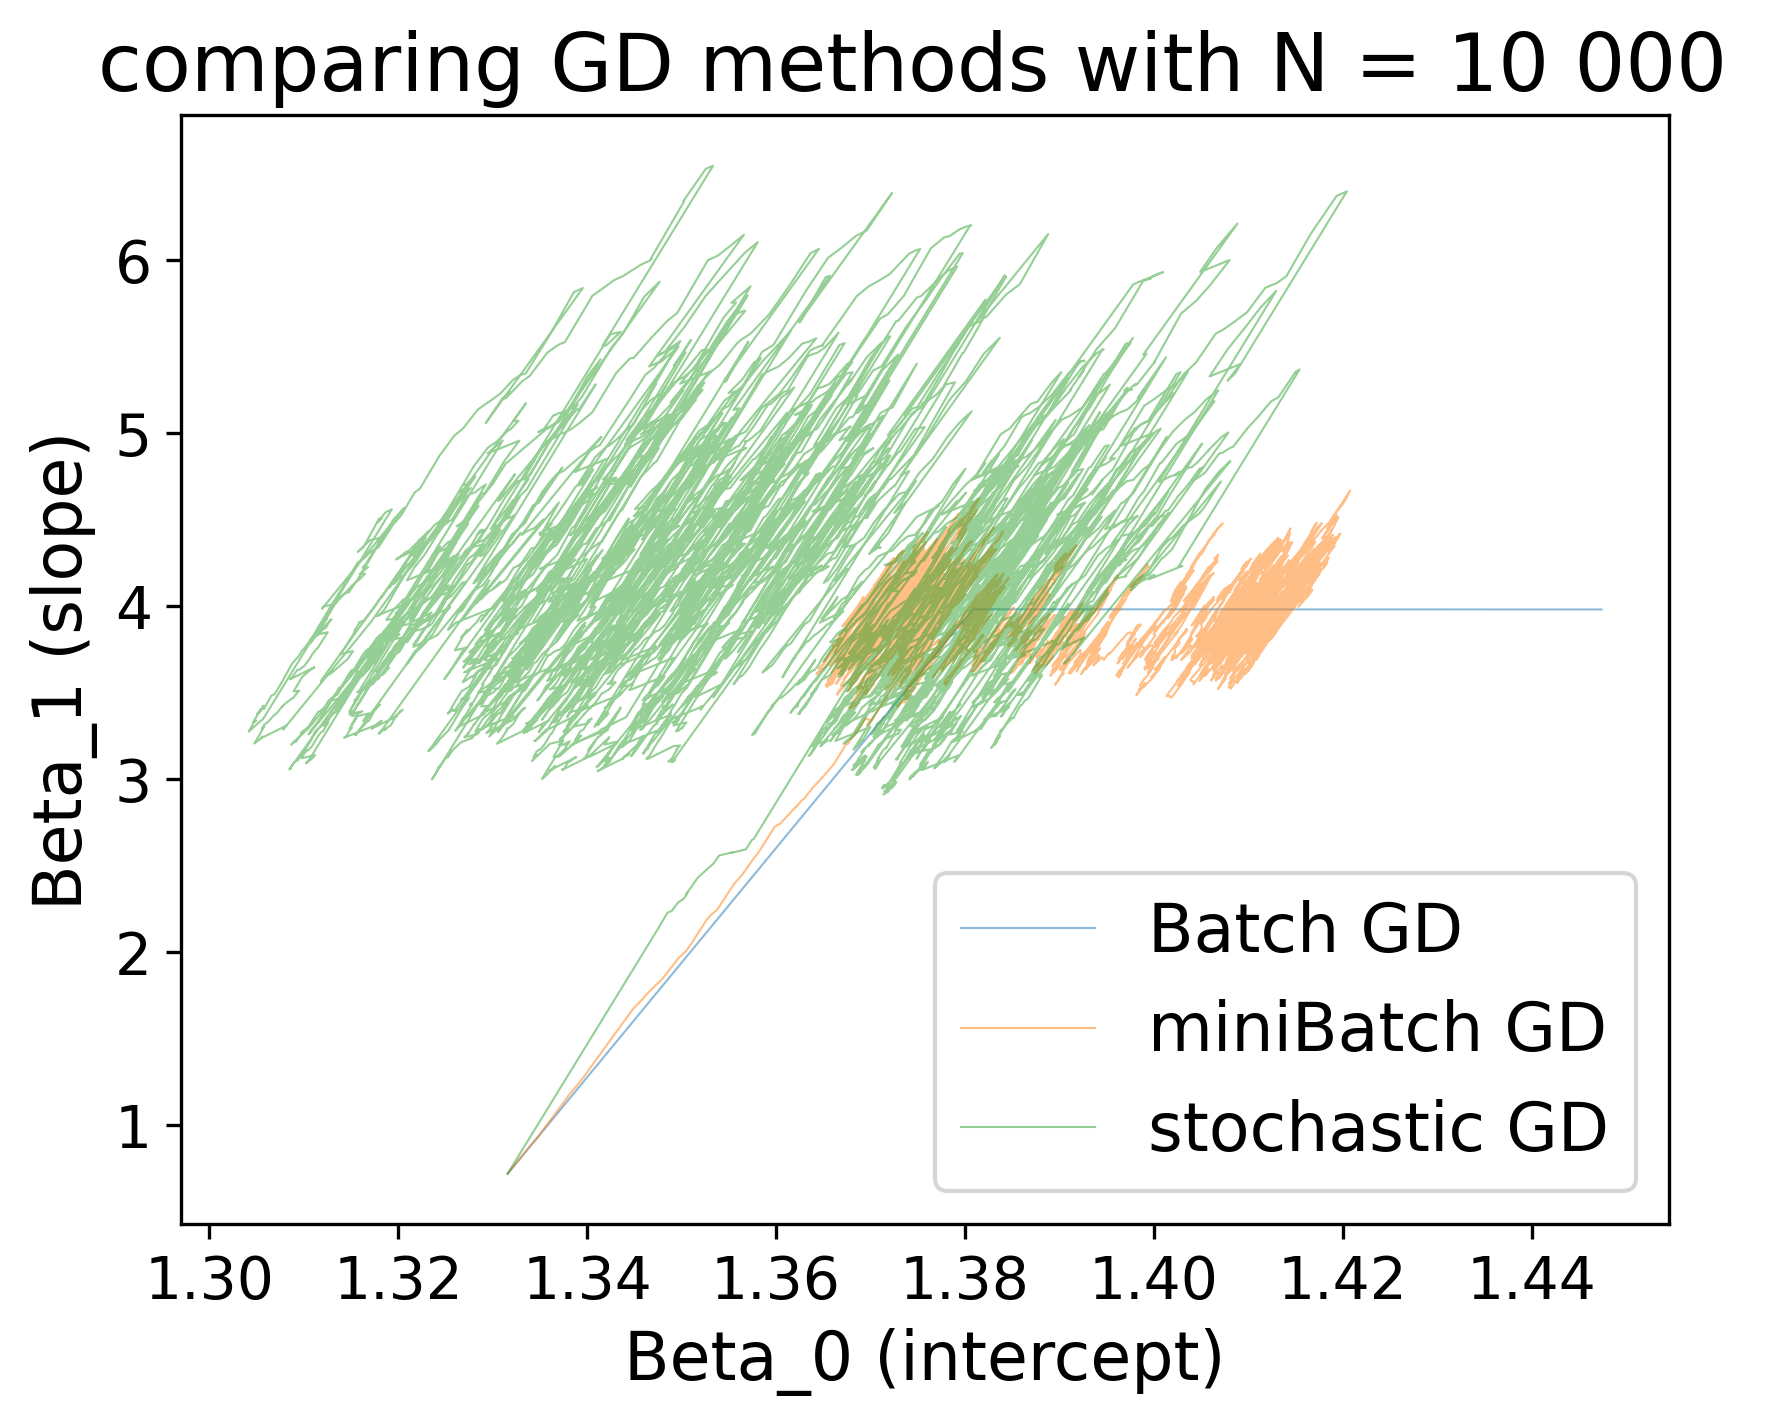

batch      GD final values, slope: 3.98, intercept: 1.45
minibatch  GD final values, slope: 3.95, intercept: 1.41
stochastic GD final values, slope: 4.18, intercept: 1.36


In [8]:
plt.title('comparing GD methods with N = 10 000 ')
plt.plot(intercepts_2, slopes_2, label = 'Batch GD', alpha = 0.5, linewidth =0.5)
plt.plot(intercepts_1_mb, slopes_1_mb, label = 'miniBatch GD', alpha = 0.5, linewidth =0.5)
plt.plot(intercepts_0_s, slopes_0_s, label = 'stochastic GD', alpha = 0.5, linewidth =0.5)
plt.xlabel("Beta_0 (intercept)")
plt.ylabel("Beta_1 (slope)")
plt.legend()
plt.show()

print("batch      GD final values, slope: {:.2f}, intercept: {:.2f}".format(slopes_2[-1], intercepts_2[-1]))
print("minibatch  GD final values, slope: {:.2f}, intercept: {:.2f}".format(slopes_1_mb[-1], intercepts_1_mb[-1]))
print("stochastic GD final values, slope: {:.2f}, intercept: {:.2f}".format(slopes_0_s[-1], intercepts_0_s[-1]))

### Step 6: 

For each of the three algorithms, try out a smaller and a larger learning rate than the values suggested. Try changing them by an order of magnitude and check out the effects in a plot of the same type in as in step 5. Would an adaptive learning rate be a solution? Qualitatively, how would you choose it?

- if you're far away from the minimized solution you could start with a larger learning rate to take bigger steps and approach the solution quicker, as you get closer you could size down the learning rate to avoid missing it. 

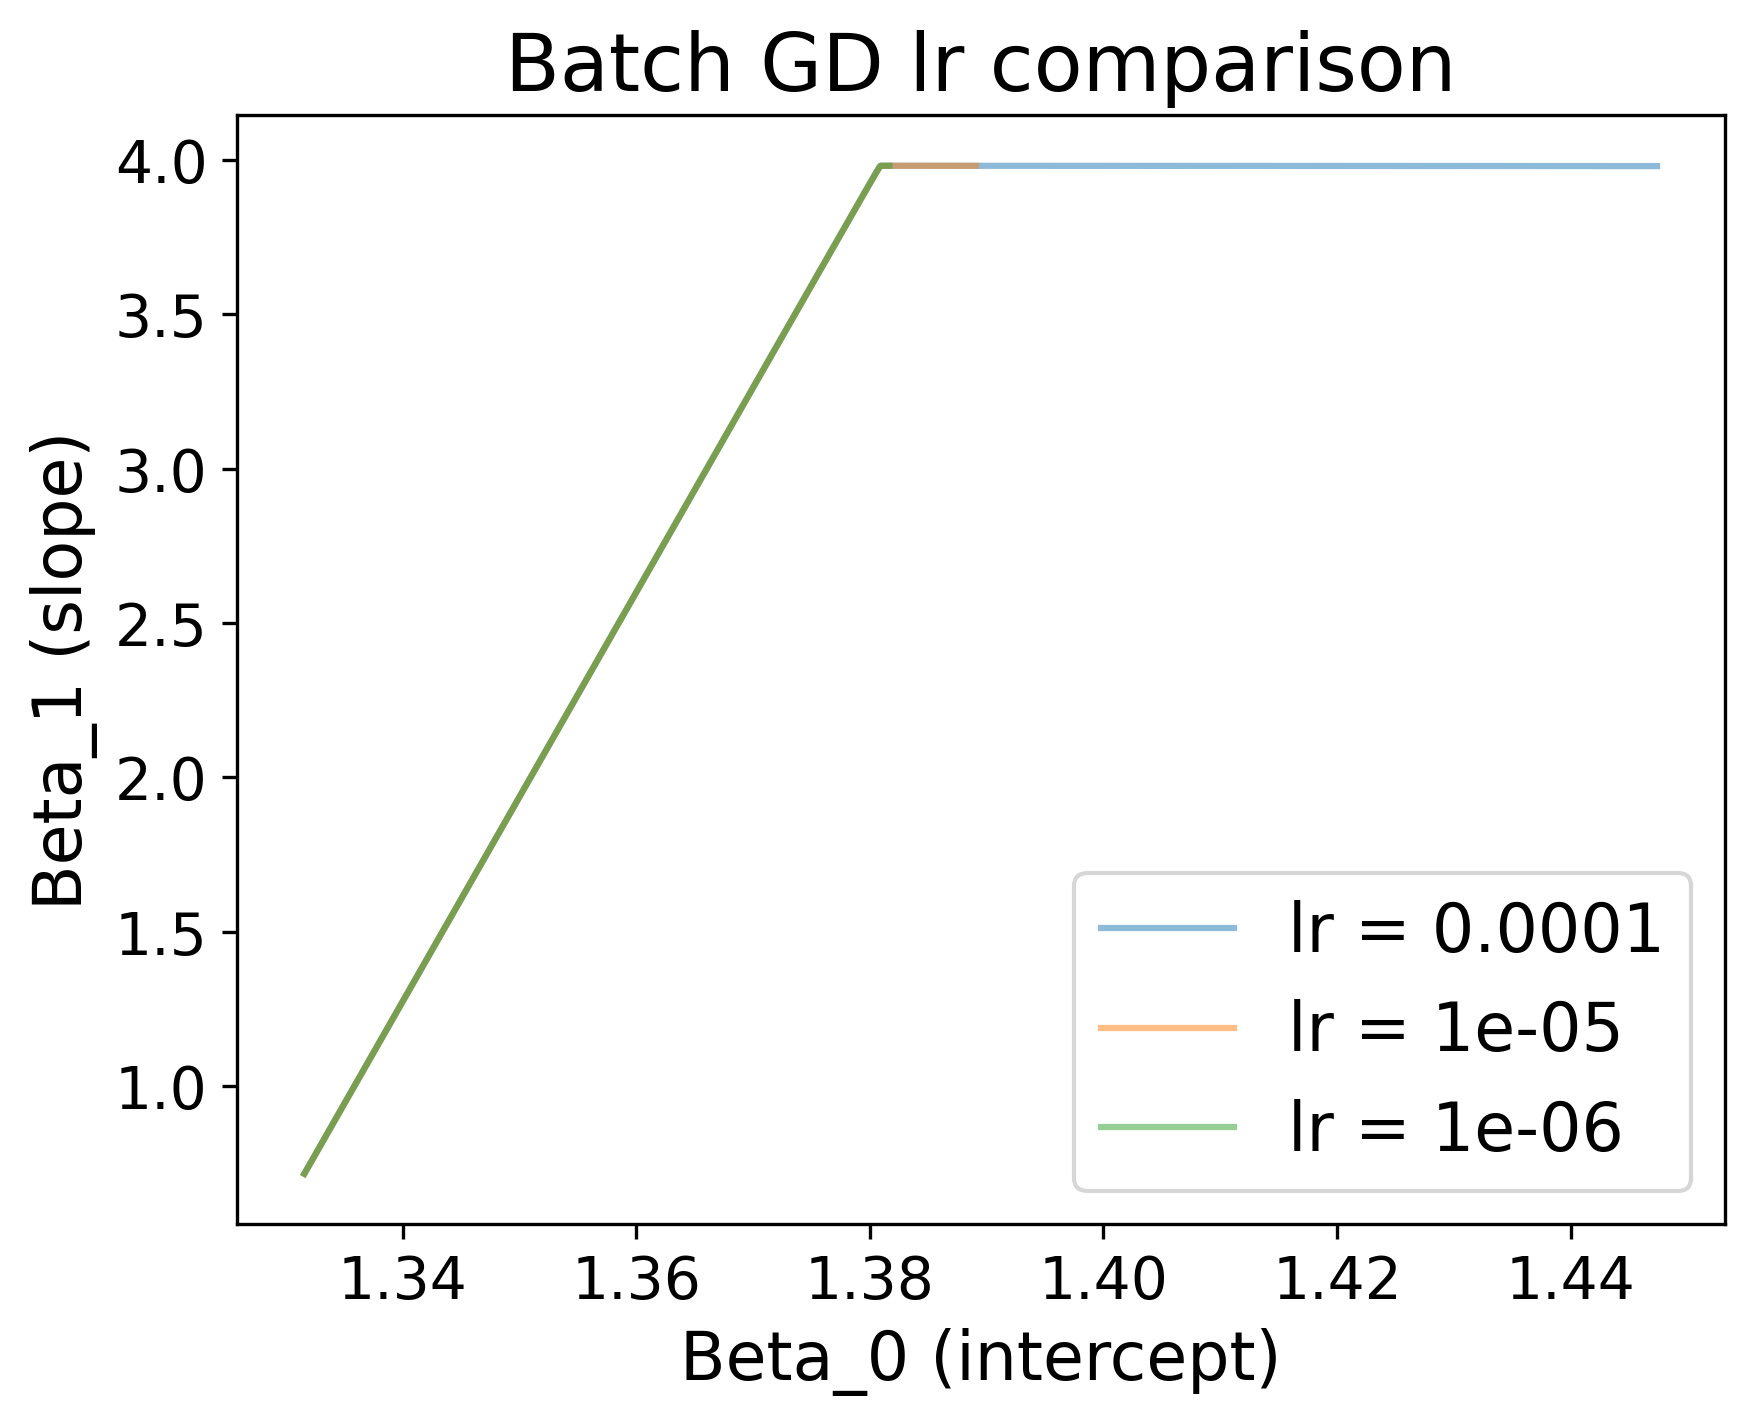

In [9]:
lrs = [0.0001, 0.00001, 0.000001]

for lr in lrs:
    slopes, intercepts, mse_vals = batch_GD(X, y, lr, 10000, beta0)
    plt.plot(intercepts, slopes, label = 'lr = {}'.format(lr), alpha = 0.5)

plt.xlabel("Beta_0 (intercept)")
plt.ylabel("Beta_1 (slope)")
plt.title("Batch GD lr comparison")
plt.legend()
plt.show()

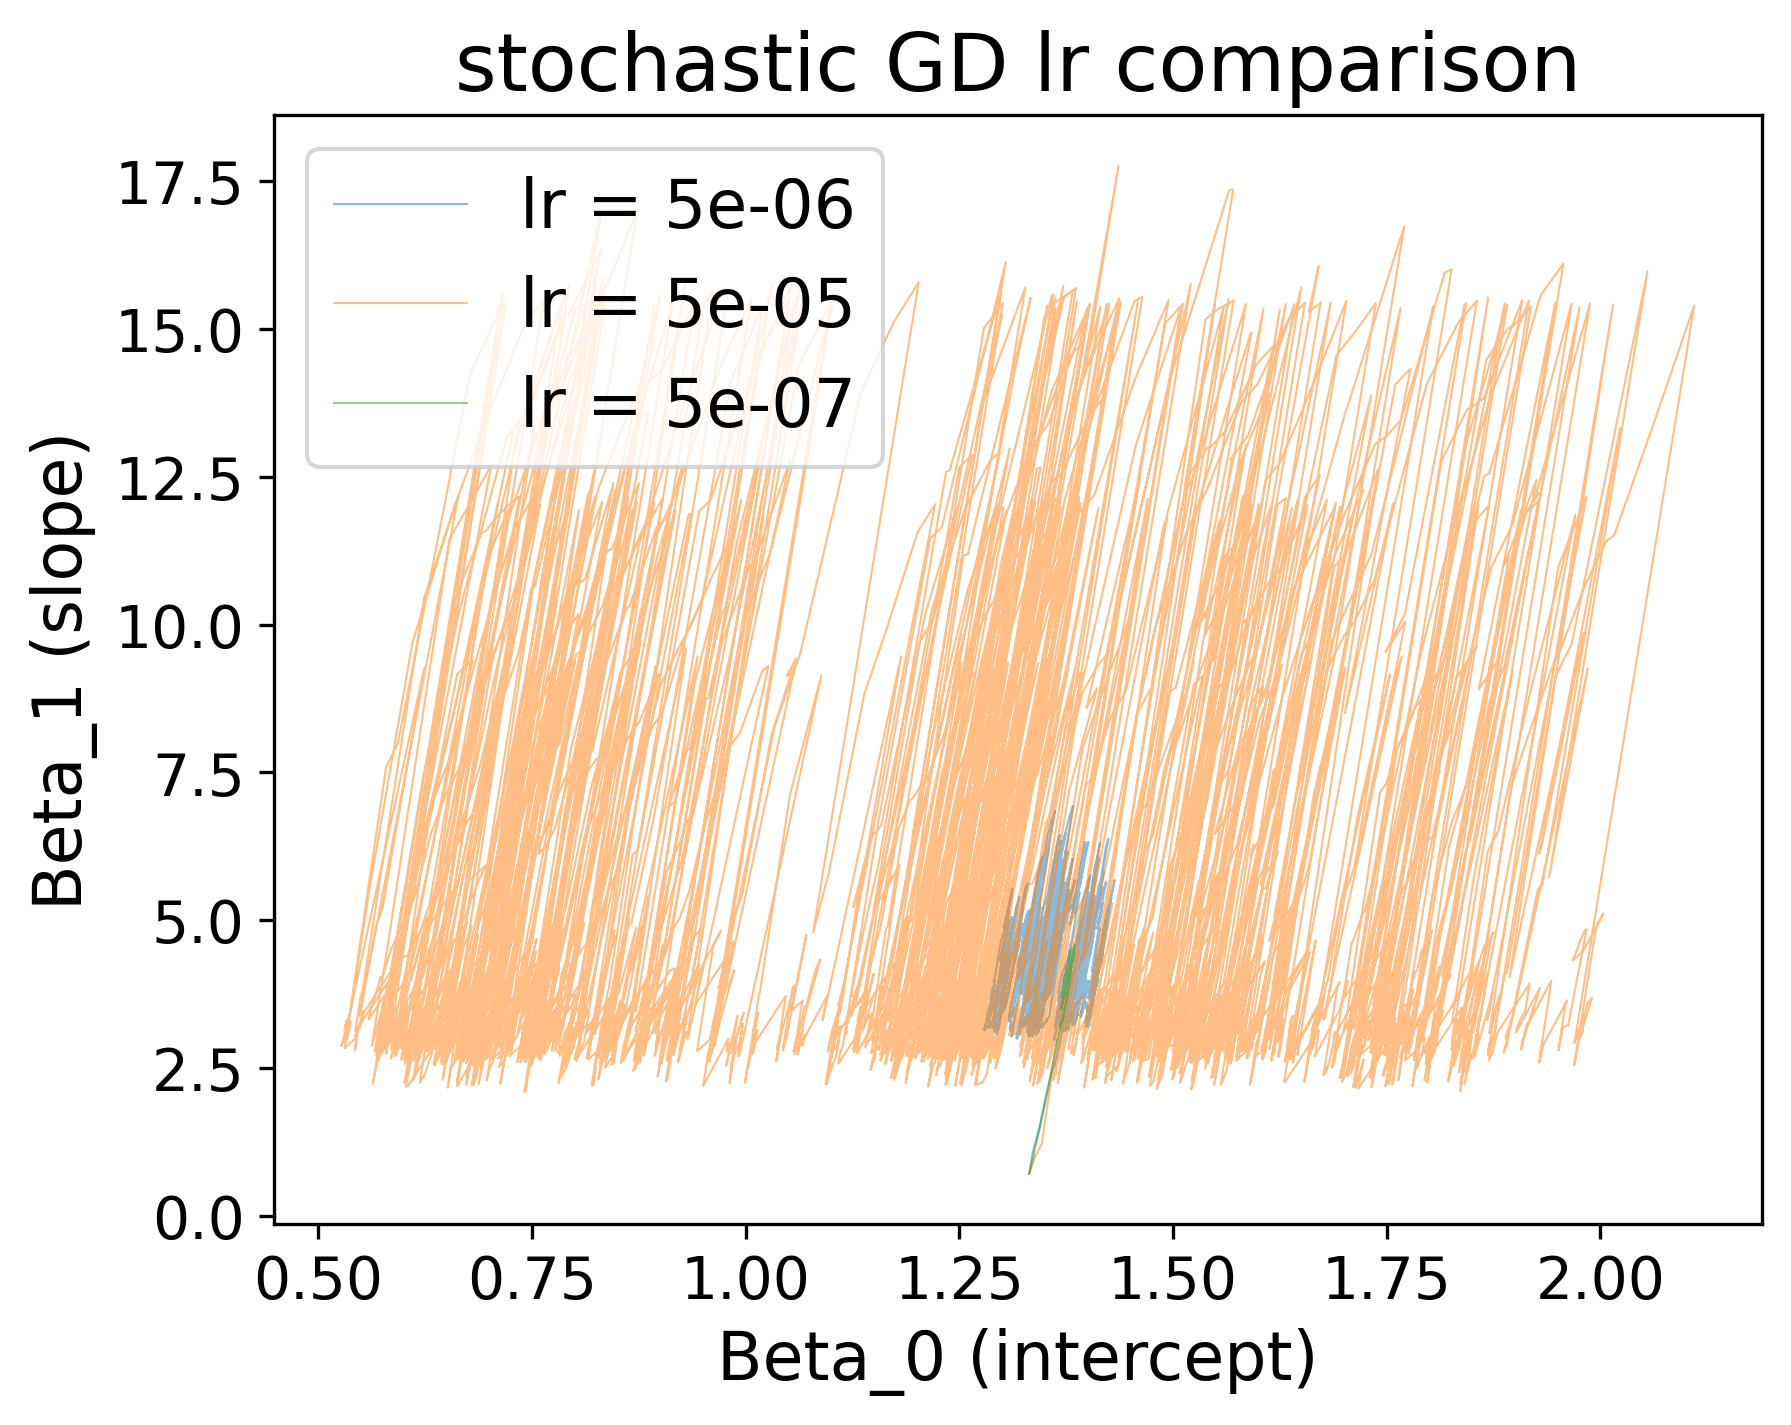

In [10]:
lrs = [0.000005, 0.00005, 0.0000005]

for lr in lrs:
    slopes, intercepts, mse_vals = stochastic_GD(X, y, lr, 10000, beta0)
    plt.plot(intercepts, slopes, label = 'lr = {}'.format(lr), alpha = 0.5, linewidth =0.5)
    
plt.xlabel("Beta_0 (intercept)")
plt.ylabel("Beta_1 (slope)")
plt.title("stochastic GD lr comparison")
plt.legend()
plt.show()

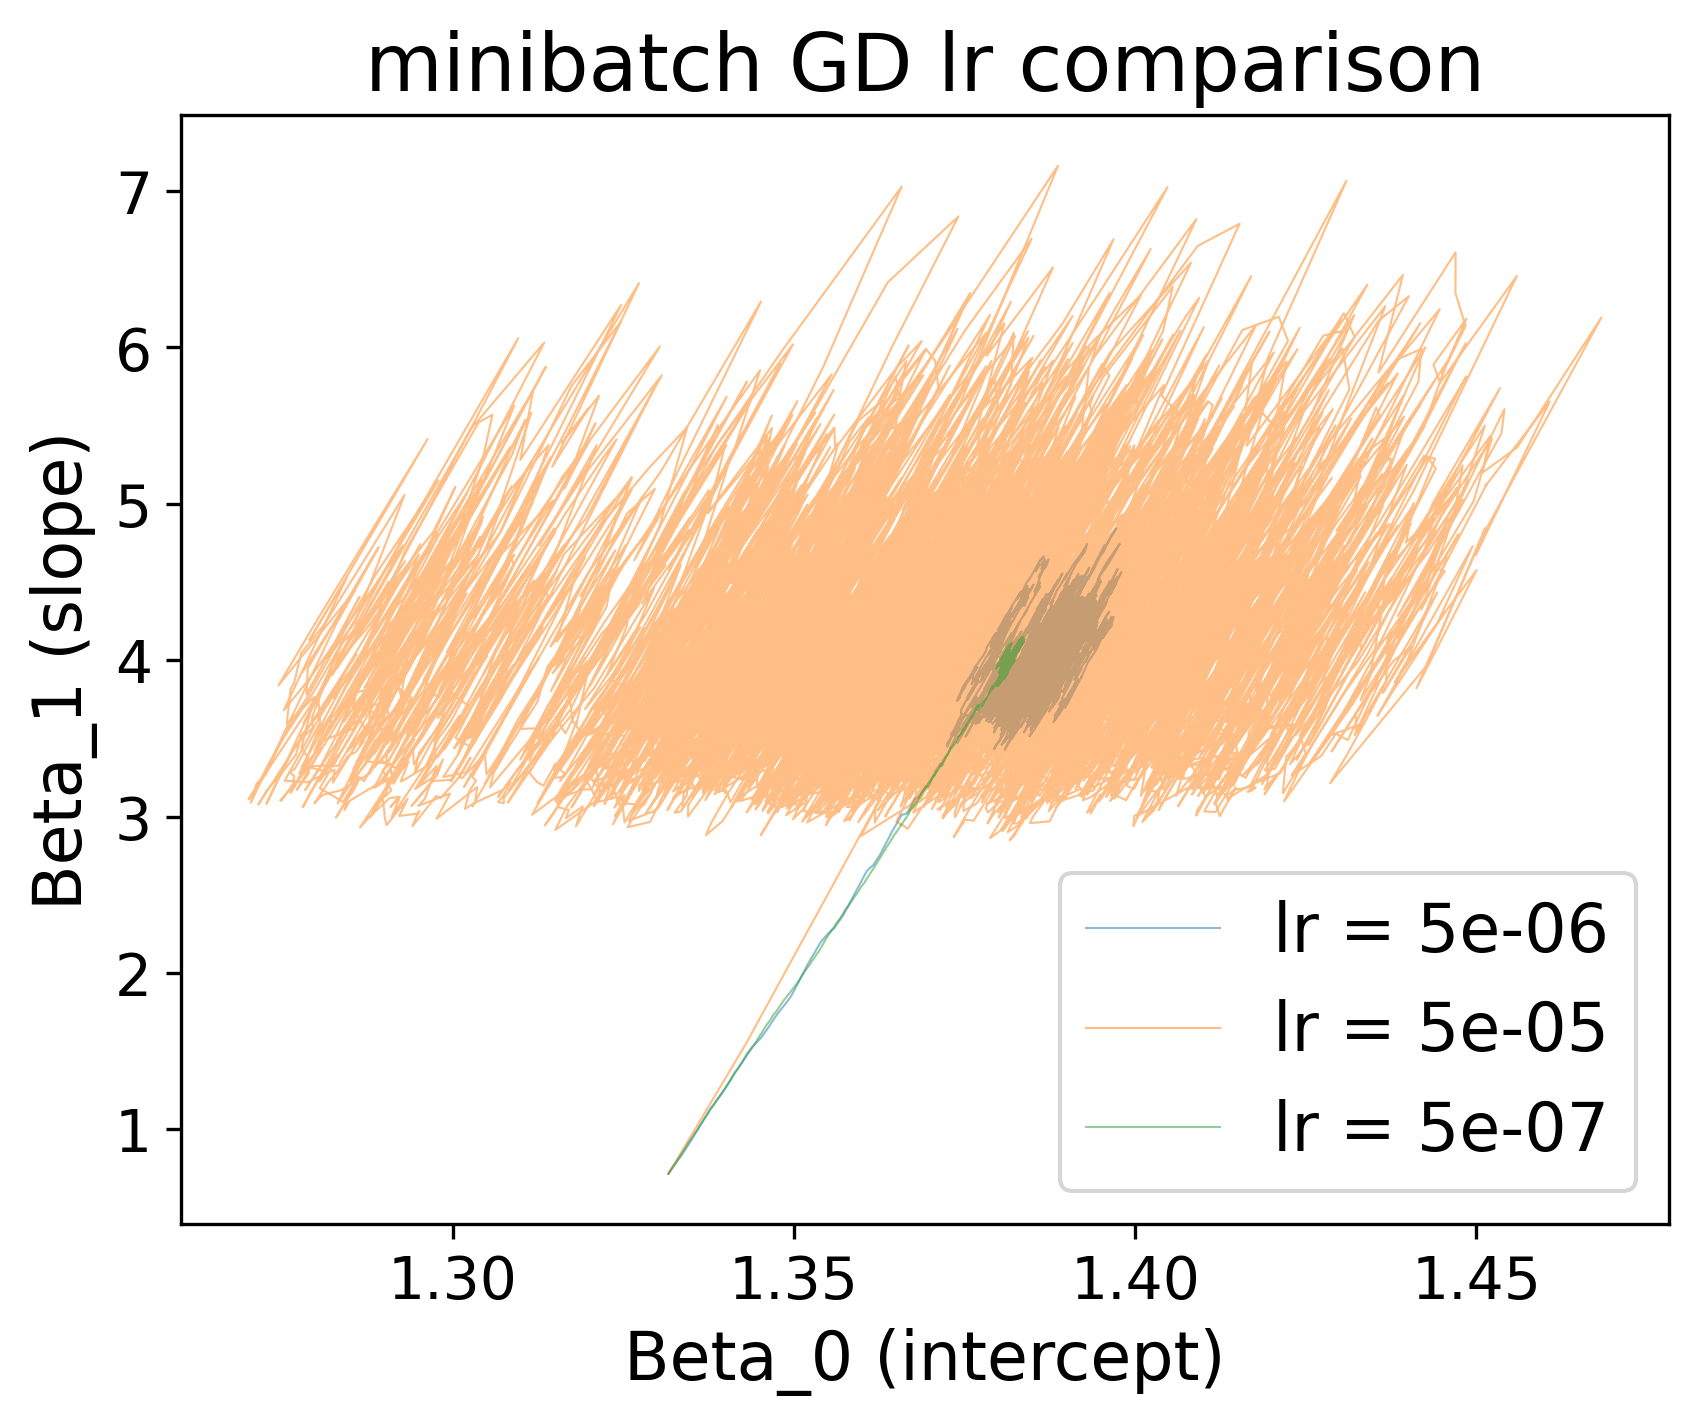

In [11]:
lrs = [0.000005, 0.00005, 0.0000005]

for lr in lrs:
    slopes, intercepts, mse_vals = minibatch_GD(X, y, lr, 10000, beta0)
    plt.plot(intercepts,slopes, label = 'lr = {}'.format(lr), alpha = 0.5, linewidth =0.5)
    
plt.xlabel("Beta_0 (intercept)")
plt.ylabel("Beta_1 (slope)")    
plt.title("minibatch GD lr comparison")
plt.legend()
plt.show()